# Introduction
The goal of this project is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The challenge lies in the fact that the Twitter archive is great, but it only contains very basic tweet information that comes in JSON format. For a successful project, I needed to gather, asses and clean the Twitter data for a worthy analysis and visualization.

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [156]:
# Read the twitter_archive_enhanced.csv file and 
# set it as a dataframe called df.
df = pd.read_csv("twitter-archive-enhanced.csv")
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [157]:
df.shape

(2356, 17)

In [158]:
# Programmatically download the dog image prediction files from 
# the Udacity server using Request library
import os
import requests

# Save to a file
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [159]:
#open tsv file
images = pd.read_csv('image_predictions/image-predictions.tsv',
                       sep='\t')

In [160]:
images.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


<b> Query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file. </b>

In [161]:
#Importing libraries
import tweepy
from tweepy import OAuthHandler
import json
import csv
import sys
import os
import time


# authentication pieces
consumer_key = 'zVmpbBds8SqFh8XiIUJ33P6OR'
consumer_secret = '2Pz6TfiWrC7qSKcZP9Xzxm99VSbh19astg906BvnXiPPe1k856'
access_token = '152576341-mK2h4zxZ38xrfAFlogl99v2MtOwOLq1f0aUBvglB'
access_secret = 'fWrscvS1N4UauRcicWkqziKSh3an9RGQWlOhKb5TNNgwS'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth)

In [162]:
#Twitter Query using tweet_id information from the df.

tweet_ids = list(df.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 754011816964026368
Error for: 751950017322246144
Error for: 679001094530465792


In [163]:
import json

with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

In [164]:
tweet_df = pd.read_json('tweet_json.txt',orient='index')

# Assessing Data
After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

In [165]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
entities                         2342 non-null object
extended_entities                1823 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
geo                              0 non-null float64
id                               2342 non-null int64
id_str                           2342 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  23

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [167]:
df_name = df['name']
df_name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

In [168]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Quality Issues

Issues with the data's content




1) 'df' dataframe tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,in_reply_to_user_id should be an object but its shown as integer, float, float, float, float respectively

2) The timestamp datatype in 'df' dataframe is referred as object which should have been datetime in t_archive dataframe.

3) Need to remove rows that have been retweeted, therby they are not original tweets.

4) In 'df' dataframe, names of dogs are mislabelled, mispelled or missing.

5) In name column of 'df' dataframe, some names start with lowercase letters which doesnot look to be names of person (some examples include a, an, all, my, one, his, him etc) , so converting those names to 'None'

6) In 'df' dataframe 181 records have a retweeted_status_id, these will need to be exluded from the dataset. 

7) In 'images' dataframe:<br>
       p1 column: capitalize the first letter of each word, make consistent<br>
       p2 column: capitalize the first letter of each word, make consistent<br>
       p3 column: capitalize the first letter of each word, make consistent<br>
       Remove the ' _ ' between the words

8) In 'tweet_df' dataframe, the id column needs to be renamed to "tweet_id" to match with the other 2 tables

9) In 'tweet_df' dataframe, 170 records have a retweeted_status, will need to be excluded

# Tidiness Issues

Issues with the structure of the data

1) 'df' Dataframe:
        Parse the datetime information into seperate columns
        Drop columns that are not needed & rearrange column order for an easier read
        Combine each dog stage column into a single column named "stage"
        tweet_id column needs to be converted from a number to string value
        Date and Time columns need to be converted to datetime objects
        Rating columns need to be converted to float values

2) 'tweet_df' dataframe:
        convert id column from a number to a string
        Reindex the tweet_df table using the tweet_id
        Change column order in the tweet_df and the df tables for an easier read of the data
        Consolidate the tweet_df table into the following columns: tweet_id, retweet count, favorite count,text


# Cleaning Data

In [337]:
df_clean = df.copy()
images_clean = images.copy()
tweet_df_clean = tweet_df.copy()

# DF_CLEAN dataframe
Define
Missing Data: replace faulty names or corrected names

In [338]:
# Missing Data# Missin 
# replacing faulty names with None value or corrected Name
df_clean['name'].replace('the', 'None', inplace=True)
df_clean['name'].replace("light",'None', inplace=True)
df_clean['name'].replace("life",'None', inplace=True)
df_clean['name'].replace("an",'None', inplace=True)
df_clean['name'].replace("a",'None', inplace=True)
df_clean['name'].replace("by",'None', inplace=True)
df_clean['name'].replace("actually",'None', inplace=True)
df_clean['name'].replace("just",'None', inplace=True)
df_clean['name'].replace("getting",'None', inplace=True) 
df_clean['name'].replace("infuriating",'None', inplace=True) 
df_clean['name'].replace("old",'None', inplace=True) 
df_clean['name'].replace("all",'None', inplace=True) 
df_clean['name'].replace("this",'None', inplace=True) 
df_clean['name'].replace("very",'None', inplace=True) 
df_clean['name'].replace("mad",'None', inplace=True) 
df_clean['name'].replace("not",'None', inplace=True)
df_clean['name'].replace("one",'None', inplace=True)
df_clean['name'].replace("my",'None', inplace=True)
df_clean['name'].replace("O","O'Malley", inplace=True)
df_clean['name'].replace("quite","None", inplace=True)
df_clean['name'].replace("such","None", inplace=True)

In [339]:
# Identify how many tweets are retweets by the "retweeted_status" columns# 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

<b> Define </b>¶<br>
Identify and exlude tweets that have a retweeted_status because the tweet is a retweet and therefore not original.

In [340]:
df_clean[df_clean['retweeted_status_id'].notnull()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [341]:
# remove these values from the dataframe using the drop() function
df_clean.drop(df_clean[df_clean['retweeted_status_id'].notnull()== True].index,inplace=True)

In [342]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

<b> Convert the timestamp column from a string to DateTime objects </b>

In [343]:
from datetime import datetime,timedelta

type(df_clean['timestamp'].iloc[0])

str

In [344]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['date'] = df_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_clean['time'] = df_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))

In [345]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23


In [346]:
df_clean['breed_stage'] = df[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

df_clean['breed_stage'].replace("NoneNoneNoneNone","None ", inplace=True)
df_clean['breed_stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
df_clean['breed_stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
df_clean['breed_stage'].replace("NoneNonepupperNone","pupper", inplace=True)
df_clean['breed_stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)
df_clean['breed_stage'].replace("doggoNoneNonepuppo", "None ", inplace = True)
df_clean['breed_stage'].replace("doggoNonepupperNone", "None ", inplace = True)
df_clean['breed_stage'].replace("doggoflooferNoneNone", "None ", inplace = True)

In [347]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,breed_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,08-01-2017,00:17,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,07-31-2017,00:18,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,07-30-2017,15:58,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,07-29-2017,16:00,None


In [348]:
# remove unwanted columns from df_clean columns
df_clean.drop(['timestamp',
               'retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'source',
               'doggo',
               'floofer',
               'pupper',
               'puppo',
               'text'], axis=1,inplace=True)

In [349]:
df_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,date,time,breed_stage
0,892420643555336193,13,10,Phineas,08-01-2017,16:23,None
1,892177421306343426,13,10,Tilly,08-01-2017,00:17,None
2,891815181378084864,12,10,Archie,07-31-2017,00:18,None
3,891689557279858688,13,10,Darla,07-30-2017,15:58,None
4,891327558926688256,12,10,Franklin,07-29-2017,16:00,None


In [350]:
# Change the order (the index) of the df_clean columns
columnTitles = ['tweet_id', 
                'date', 
                'time',
                'name',
                'breed_stage',
                'rating_numerator',
                'rating_denominator']
df_clean = df_clean.reindex(columns=columnTitles)

In [351]:
df_clean.head()

,tweet_id,date,time,name,breed_stage,rating_numerator,rating_denominator
0,892420643555336193,08-01-2017,16:23,Phineas,None,13,10
1,892177421306343426,08-01-2017,00:17,Tilly,None,13,10
2,891815181378084864,07-31-2017,00:18,Archie,None,12,10
3,891689557279858688,07-30-2017,15:58,Darla,None,13,10
4,891327558926688256,07-29-2017,16:00,Franklin,None,12,10


In [352]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null int64
date                  2175 non-null object
time                  2175 non-null object
name                  2175 non-null object
breed_stage           2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
dtypes: int64(3), object(4)
memory usage: 135.9+ KB


In [353]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)

In [354]:
type(df_clean['tweet_id'].iloc[0])

str

In [355]:
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean['time'] = pd.to_datetime(df_clean['time'])

In [356]:
type(df_clean['date'].iloc[0])
type(df_clean['time'].iloc[0])

pandas._libs.tslib.Timestamp

In [357]:
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype(float)

In [358]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null object
date                  2175 non-null datetime64[ns]
time                  2175 non-null datetime64[ns]
name                  2175 non-null object
breed_stage           2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 135.9+ KB


In [359]:
tweet_df_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype='object')

In [360]:
#In 'tweet_df' dataframe, the id column needs to be renamed to "tweet_id" to match with the other 2 tables
tweet_df_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

In [361]:
tweet_df_clean.tweet_id = tweet_df_clean.tweet_id.astype(str)

In [362]:
# Identify how many tweets are retweets by the "retweeted_status" columns
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
entities                         2342 non-null object
extended_entities                1823 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
geo                              0 non-null float64
tweet_id                         2342 non-null object
id_str                           2342 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2

In [363]:
#Single out the non-null values in the 'retweet_status' column
tweet_df_clean[tweet_df_clean['retweeted_status'].notnull()==True]

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,tweet_id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-26 06:48:02.905632768,NaN,NaN,2015-11-20 03:51:47,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,0,0,NaN,667550882905632768,667550882905632768,...,NaN,NaN,NaN,33,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-26 06:48:24.950915073,NaN,NaN,2015-11-20 03:51:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/ua...,0,0,NaN,667550904950915072,667550904950915072,...,NaN,NaN,NaN,35,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,0,"{'contributors_enabled': False, 'created_at': ..."
1992-07-24 17:26:49.858043904,NaN,NaN,2016-03-21 19:31:59,"{'hashtags': [{'indices': [61, 73], 'text': 'L...",{'media': [{'display_url': 'pic.twitter.com/j6...,0,0,NaN,711998809858043904,711998809858043904,...,NaN,NaN,NaN,136,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-07-28 05:05:15.802583040,NaN,NaN,2016-06-17 16:01:16,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,743835915802583040,743835915802583040,...,NaN,NaN,NaN,2291,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,0,"{'contributors_enabled': False, 'created_at': ..."
1993-08-28 07:04:05.350707200,NaN,NaN,2016-06-25 01:52:36,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,746521445350707200,746521445350707200,...,NaN,NaN,NaN,1077,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-09-05 15:18:28.580548608,NaN,NaN,2016-06-27 01:37:04,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,747242308580548608,747242308580548608,...,NaN,NaN,NaN,3162,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This pupper killed this great w...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-03 06:49:54.570878976,NaN,NaN,2016-07-11 01:11:51,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'additional_media_info': {'monetiz...,0,0,NaN,752309394570878976,752309394570878976,...,NaN,NaN,NaN,18381,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everyone needs to watch this. 1...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-07 19:52:24.171524096,NaN,NaN,2016-07-12 03:11:42,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,0,0,NaN,752701944171524096,752701944171524096,...,NaN,NaN,NaN,3182,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: HEY PUP WHAT'S THE PART OF THE ...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-14 17:37:14.498793472,NaN,NaN,2016-07-13 18:42:44,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,753298634498793472,753298634498793472,...,NaN,NaN,NaN,6377,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Carly. She's actually 2...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-12-02 23:27:21.593970688,NaN,NaN,2016-07-

In [364]:
#remove the tweets that are retweets from the dataset
tweet_df_clean.drop(tweet_df_clean[tweet_df_clean['retweeted_status'].notnull()== True].index,inplace=True)

In [365]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2172 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2172 non-null datetime64[ns]
entities                         2172 non-null object
extended_entities                1748 non-null object
favorite_count                   2172 non-null int64
favorited                        2172 non-null int64
geo                              0 non-null float64
tweet_id                         2172 non-null object
id_str                           2172 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2

In [366]:
tweet_df_clean.drop(['contributors',
                     'coordinates',
                     'created_at',
                     'entities',
                     'extended_entities',
                     'favorited',
                     'geo',
                     'id_str',
                     'in_reply_to_screen_name',
                     'in_reply_to_status_id',
                     'in_reply_to_status_id_str',
                     'in_reply_to_user_id',
                     'in_reply_to_user_id_str',
                     'is_quote_status',
                     'lang',
                     'place',
                     'possibly_sensitive',
                     'possibly_sensitive_appealable',
                     'quoted_status',
                     'quoted_status_id',
                     'quoted_status_id_str',
                     'retweeted',
                     'retweeted_status',
                     'source',
                     'truncated',
                     'user'], axis=1,inplace=True)

In [367]:
tweet_df_clean.head(10)

,favorite_count,tweet_id,retweet_count,text
1991-02-08 13:48:08.022790149,2566,666020888022790144,517,Here we have a Japanese Irish Setter. Lost eye...
1991-02-08 16:08:05.002620928,130,666029285002620928,47,This is a western brown Mitsubishi terrier. Up...
1991-02-08 17:16:52.701032449,125,666033412701032448,44,Here is a very happy pup. Big fan of well-main...
1991-02-08 20:17:06.329800704,299,666044226329800704,141,This is a purebred Piers Morgan. Loves to Netf...
1991-02-08 21:40:48.165822465,109,666049248165822464,41,Here we have a 1949 1st generation vulpix. Enj...
1991-02-08 22:05:58.794694657,133,666050758794694656,58,This is a truly beautiful English Wilson Staff...
1991-02-08 22:24:13.826850816,1221,666051853826850816,852,This is an odd dog. Hard on the outside but lo...
1991-02-08 23:25:25.042405380,434,666055525042405376,252,Here is a Siberian heavily armored polar bear ...
1991-02-08 23:51:30.499244032,297,666057090499244032,142,My oh my. This is a rare blond Canadian terrie...
1991-02-09 00:16:40.524156928,111,666058600524156928,57,Here is the Rand Paul of retrievers folks! He'...


In [368]:
images_clean['p1'] = images_clean['p1'].str.replace('_', ' ')
images_clean['p2'] = images_clean['p2'].str.replace('_', ' ')
images_clean['p3'] = images_clean['p3'].str.replace('_', ' ')

In [369]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [370]:
images_clean['p1'] = images_clean['p1'].str.title()
images_clean['p2'] = images_clean['p2'].str.title()
images_clean['p3'] = images_clean['p3'].str.title()

In [371]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [372]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [373]:
images_clean.tweet_id = images_clean.tweet_id.astype(str)

In [374]:
df_merge = pd.merge(df_clean, tweet_df_clean,on='tweet_id', how='inner')

In [375]:
df_merge = pd.merge(df_merge, images_clean,on='tweet_id', how='inner')

In [376]:
df_merge.head()

,tweet_id,date,time,name,breed_stage,rating_numerator,rating_denominator,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,2017-07-31,2018-07-08 00:18:00,Archie,None,12.0,10.0,24940,4166,This is Archie. He is a rare Norwegian Pouncin...,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,891689557279858688,2017-07-30,2018-07-08 15:58:00,Darla,None,13.0,10.0,42043,8673,This is Darla. She commenced a snooze mid meal...,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2,891327558926688256,2017-07-29,2018-07-08 16:00:00,Franklin,None,12.0,10.0,40195,9439,This is Franklin. He would like you to stop ca...,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
3,891087950875897856,2017-07-29,2018-07-08 00:08:00,None,None,13.0,10.0,20158,3121,Here we have a majestic great white breaching ...,...,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
4,890729181411237888,2017-07-28,2018-07-08 00:22:00,None,None,13.0,10.0,65301,18957,When you watch your owner call another dog a g...,...,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True


In [377]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1298
Data columns (total 21 columns):
tweet_id              1299 non-null object
date                  1299 non-null datetime64[ns]
time                  1299 non-null datetime64[ns]
name                  1299 non-null object
breed_stage           1299 non-null object
rating_numerator      1299 non-null float64
rating_denominator    1299 non-null float64
favorite_count        1299 non-null int64
retweet_count         1299 non-null int64
text                  1299 non-null object
jpg_url               1299 non-null object
img_num               1299 non-null int64
p1                    1299 non-null object
p1_conf               1299 non-null float64
p1_dog                1299 non-null bool
p2                    1299 non-null object
p2_conf               1299 non-null float64
p2_dog                1299 non-null bool
p3                    1299 non-null object
p3_conf               1299 non-null float64
p3_dog             

In [378]:
df_merge['date'] = df_merge['date'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_merge['time'] = df_merge['time'].apply(lambda time: time.strftime('%H:%M'))

In [379]:
df_merge.head()

,tweet_id,date,time,name,breed_stage,rating_numerator,rating_denominator,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,07-31-2017,00:18,Archie,None,12.0,10.0,24940,4166,This is Archie. He is a rare Norwegian Pouncin...,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,891689557279858688,07-30-2017,15:58,Darla,None,13.0,10.0,42043,8673,This is Darla. She commenced a snooze mid meal...,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2,891327558926688256,07-29-2017,16:00,Franklin,None,12.0,10.0,40195,9439,This is Franklin. He would like you to stop ca...,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
3,891087950875897856,07-29-2017,00:08,None,None,13.0,10.0,20158,3121,Here we have a majestic great white breaching ...,...,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
4,890729181411237888,07-28-2017,00:22,None,None,13.0,10.0,65301,18957,When you watch your owner call another dog a g...,...,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True


In [380]:
# Save to a file
folder_name = 'Final_Documents'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
df_clean.to_csv('Final_Documents/twitter_archive_master.csv')
images_clean.to_csv('Final_Documents/image_prediction_master.csv')
tweet_df_clean.to_csv('Final_Documents/tweet_query_master.csv')
df_merge.to_csv('Final_Documents/final_master.csv')

In [404]:
# Read in the updated dataframes
df_master= pd.read_csv("Final_Documents/final_master.csv")
image_pred_df = pd.read_csv("Final_Documents/image_prediction_master.csv")

In [405]:
df_master.head()

,Unnamed: 0,tweet_id,date,time,name,breed_stage,rating_numerator,rating_denominator,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,891815181378084864,07-31-2017,00:18,Archie,None,12.0,10.0,24940,4166,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,1,891689557279858688,07-30-2017,15:58,Darla,None,13.0,10.0,42043,8673,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2,2,891327558926688256,07-29-2017,16:00,Franklin,None,12.0,10.0,40195,9439,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
3,3,891087950875897856,07-29-2017,00:08,None,None,13.0,10.0,20158,3121,...,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
4,4,890729181411237888,07-28-2017,00:22,None,None,13.0,10.0,65301,18957,...,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True


In [406]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 22 columns):
Unnamed: 0            1299 non-null int64
tweet_id              1299 non-null int64
date                  1299 non-null object
time                  1299 non-null object
name                  1299 non-null object
breed_stage           1299 non-null object
rating_numerator      1299 non-null float64
rating_denominator    1299 non-null float64
favorite_count        1299 non-null int64
retweet_count         1299 non-null int64
text                  1299 non-null object
jpg_url               1299 non-null object
img_num               1299 non-null int64
p1                    1299 non-null object
p1_conf               1299 non-null float64
p1_dog                1299 non-null bool
p2                    1299 non-null object
p2_conf               1299 non-null float64
p2_dog                1299 non-null bool
p3                    1299 non-null object
p3_conf               1299 non-null fl

In [407]:
df_master.drop(['Unnamed: 0'],axis=1,inplace=True)
df_master.tweet_id = df_master.tweet_id.astype(str)

In [408]:
# Descriptive statistics
print('\n')
print("Descriptive statistics of the dataset:")
stats= df_master.drop(['tweet_id'], axis=1)

stats.describe()



Descriptive statistics of the dataset:


,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1.299000e+03,1.299000e+03
mean,12.843726,10.545804,8270.517321,2519.481139,1.187067,0.587034,1.370495e-01,6.144723e-02
std,51.147640,7.874498,11431.102506,4032.094427,0.540746,0.273638,1.018687e-01,5.202736e-02
min,1.000000,2.000000,80.000000,13.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,1714.000000,582.500000,1.000000,0.354703,5.438335e-02,1.649005e-02
50%,11.000000,10.000000,3825.000000,1263.000000,1.000000,0.578120,1.203580e-01,4.953060e-02
75%,12.000000,10.000000,10253.000000,2979.500000,1.000000,0.837040,1.982365e-01,9.470910e-02
max,1776.000000,170.000000,122574.000000,60820.000000,4.000000,1.000000,4.676780e-01,2.710420e-01


Key Observations:

The neural network performed the best on the 1st iteration with a mean prediciton of 0.587
Mean rating for a dog was 12.843/10 with an outlier of 1776/10
Mean retweet count for an original tweet was 2519 and a maximum value of 60820.
Mean favorite count for an original tweet was 8270 and a maximum value of 122574.<br>
Questions:

Is the most popular tweet, which has a maximum favorite count of 122574, the same tweet with the highest retweet count of 60820?

Identify the rating_numerator outlier further.


In [409]:
df_master[df_master['rating_numerator']==1776]

,tweet_id,date,time,name,breed_stage,rating_numerator,rating_denominator,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
451,749981277374128128,07-04-2016,15:00,Atticus,None,1776.0,10.0,5497,2698,This is Atticus. He's quite simply America af....,...,1,Bow Tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False


Turns out the outlier in the rating_numerator data is a dog named Atticus. The picture was taken on 4th July 2016 and the dog was given an extra ordinary rating of 1776/10. The dog was seen to be wearing sunglasses and a bow tie hence the AI program could not identify the breed properly. 

#### What are the top 5 most popular dog names?

In [410]:
# What are the top 5 most common dog names?
from collections import Counter

x = df_master['name']

count = Counter(x)
count.most_common(5)

[('None', 434), ('Oliver', 8), ('Winston', 7), ('Tucker', 7), ('Penny', 6)]

Top dog names are Oliver, Winston, Tucker and Penny

#### What is the most common dog rating?

In [411]:
x = df_master['rating_numerator']
count = Counter(x)
count.most_common()

[(10.0, 304),
 (12.0, 287),
 (11.0, 249),
 (13.0, 157),
 (9.0, 96),
 (8.0, 64),
 (7.0, 35),
 (6.0, 22),
 (5.0, 19),
 (14.0, 18),
 (3.0, 13),
 (4.0, 13),
 (2.0, 5),
 (1.0, 4),
 (24.0, 1),
 (75.0, 1),
 (27.0, 1),
 (165.0, 1),
 (1776.0, 1),
 (204.0, 1),
 (45.0, 1),
 (60.0, 1),
 (44.0, 1),
 (143.0, 1),
 (144.0, 1),
 (88.0, 1),
 (420.0, 1)]

#### Who is the most favorited dog?
What does their picture look like?
Does this dog also have the most retweets?

In [431]:
df_master[df_master['favorite_count']==122574]

,tweet_id,date,time,name,breed_stage,rating_numerator,rating_denominator,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
232,807106840509214720,12-09-2016,06:17,Stephan,None,13.0,10.0,122574,60820,This is Stephan. He just wants to help. 13/10 ...,...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True


In [432]:
df_master[df_master['retweet_count']==60820]

,tweet_id,date,time,name,breed_stage,rating_numerator,rating_denominator,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
232,807106840509214720,12-09-2016,06:17,Stephan,None,13.0,10.0,122574,60820,This is Stephan. He just wants to help. 13/10 ...,...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True


Results:
The same dog has both the highest favorite and retweet count! His name is Stephan. The video was posted with the dog trying to help the owner with household chores. 

In [433]:
# Top 5 Most Favorite Tweet
df_master.sort_values('favorite_count', ascending=False)[['tweet_id','favorite_count','p1','breed_stage']].head()

,tweet_id,favorite_count,p1,breed_stage
232,807106840509214720,122574,Chihuahua,None
190,819004803107983360,93394,Standard Poodle,doggo
85,859196978902773760,92097,Angora,None
61,870374049280663552,83101,Golden Retriever,None
42,877736472329191424,79664,Chesapeake Bay Retriever,None


In [434]:
# Top 5 Highest retweeted tweet
df_master.sort_values('retweet_count', ascending=False)[['tweet_id','retweet_count','p1','breed_stage']].head()

,tweet_id,retweet_count,p1,breed_stage
232,807106840509214720,60820,Chihuahua,None
190,819004803107983360,40879,Standard Poodle,doggo
937,676219687039057920,33549,Bubble,None
385,761672994376806400,32185,Gondola,None
85,859196978902773760,31548,Angora,None


In [435]:
#Bottom 5 Lowest retweeted tweet
df_master.sort_values('retweet_count', ascending=True)[['tweet_id','retweet_count','p1','breed_stage']].head()

,tweet_id,retweet_count,p1,breed_stage
1290,666102155909144576,13,English Setter,None
1207,668291999406125056,34,Web Site,None
1288,666268910803644416,35,Desktop Computer,None
1280,666407126856765440,41,Black-And-Tan Coonhound,None
1120,670676092097810432,45,Dandie Dinmont,None


In [416]:
#Lets take a look at the lowest rated dogs 
df_master[df_master['rating_numerator']==1]

,tweet_id,date,time,name,breed_stage,rating_numerator,rating_denominator,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
965,675153376133427200,12-11-2015,03:21,None,None,1.0,10.0,6588,2796,What kind of person sends in a picture without...,...,1,Paper Towel,0.327957,False,Mailbox,0.096027,False,Seat Belt,0.034995,False
1234,667549055577362432,11-20-2015,03:44,None,None,1.0,10.0,5951,2384,Never seen dog like this. Breathes heavy. Tilt...,...,1,Electric Fan,0.984377,False,Spotlight,0.007737,False,Lampshade,0.001901,False
1286,666287406224695296,11-16-2015,16:11,None,None,1.0,2.0,149,66,This is an Albanian 3 1/2 legged Episcopalian...,...,1,Maltese Dog,0.857531,True,Toy Poodle,0.063064,True,Miniature Poodle,0.025581,True
1289,666104133288665088,11-16-2015,04:02,None,None,1.0,10.0,14342,6623,Not familiar with this breed. No tail (weird)....,...,1,Hen,0.965932,False,Cock,0.033919,False,Partridge,0.000052,False


In [417]:
df_master['rating_numerator'].value_counts()

10.0      304
12.0      287
11.0      249
13.0      157
9.0        96
8.0        64
7.0        35
6.0        22
5.0        19
14.0       18
3.0        13
4.0        13
2.0         5
1.0         4
204.0       1
420.0       1
45.0        1
60.0        1
44.0        1
27.0        1
24.0        1
144.0       1
88.0        1
165.0       1
75.0        1
1776.0      1
143.0       1
Name: rating_numerator, dtype: int64

#### Most common Dog Rating is 10/10 with 304 instances

In [418]:
df_master[['favorite_count', 'rating_numerator', 'retweet_count']].corr(method='pearson')

,favorite_count,rating_numerator,retweet_count
favorite_count,1.000000,0.015204,0.922747
rating_numerator,0.015204,1.000000,0.021415
retweet_count,0.922747,0.021415,1.000000


Let's see if dogs with higher ratings were getting more favorites and retweets. From the above table it can be observed that there is a strong correlation between favorites and retweets. This means that if the tweet is good in general then there will be more retweets and favorites.

Yet there is no correlation between rating and retweets or rating and favorites. In this case, it is the caption that is getting more retweets and favorites, rather than the dog itself.

In [419]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 21 columns):
tweet_id              1299 non-null object
date                  1299 non-null object
time                  1299 non-null object
name                  1299 non-null object
breed_stage           1299 non-null object
rating_numerator      1299 non-null float64
rating_denominator    1299 non-null float64
favorite_count        1299 non-null int64
retweet_count         1299 non-null int64
text                  1299 non-null object
jpg_url               1299 non-null object
img_num               1299 non-null int64
p1                    1299 non-null object
p1_conf               1299 non-null float64
p1_dog                1299 non-null bool
p2                    1299 non-null object
p2_conf               1299 non-null float64
p2_dog                1299 non-null bool
p3                    1299 non-null object
p3_conf               1299 non-null float64
p3_dog                1299 non-null

In [421]:
df_master.groupby('breed_stage')['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
breed_stage,,,,,,,,
None,1103.0,13.182230,55.496770,1.0,10.00,11.0,12.00,1776.0
doggo,34.0,11.441176,1.617914,8.0,11.00,11.0,13.00,14.0
floofer,4.0,11.500000,1.290994,10.0,10.75,11.5,12.25,13.0
pupper,143.0,10.706294,2.132354,5.0,10.00,11.0,12.00,27.0
puppo,15.0,11.866667,1.407463,9.0,11.00,12.0,13.00,14.0


Puppers are getting much lower rates than the other dog types.

Puppos get the maximum average rating : 11.87


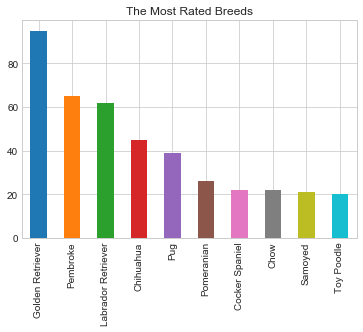

In [426]:
top=df_master.groupby('p1').filter(lambda x: len(x) >= 20)
top['p1'].value_counts().plot(kind = 'bar')
plt.title('The Most Rated Breeds');

#### The Golden Retriever breed is the most rated breed followed by Pembroke. 

In [427]:
top.groupby('p1')['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
p1,,,,,,,,
Chihuahua,45.0,10.777778,2.032563,3.0,10.00,11.0,12.00,14.0
Chow,22.0,11.318182,1.086119,10.0,10.25,11.0,12.00,13.0
Cocker Spaniel,22.0,11.181818,1.220319,9.0,10.00,11.0,12.00,13.0
Golden Retriever,95.0,13.063158,13.606796,5.0,11.00,12.0,13.00,143.0
Labrador Retriever,62.0,15.435484,22.038432,7.0,10.00,12.0,12.00,165.0
Pembroke,65.0,11.276923,1.866712,4.0,11.00,12.0,12.00,14.0
Pomeranian,26.0,13.423077,12.586256,10.0,10.00,11.0,11.75,75.0
Pug,39.0,10.435897,1.930297,3.0,10.00,10.0,11.50,13.0
Samoyed,21.0,11.523810,1.503963,7.0,11.00,12.0,13.00,13.0


In [428]:
df_master['rating_numerator'].describe()

count    1299.000000
mean       12.843726
std        51.147640
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [429]:
df_master[df_master['rating_numerator'] <= 14]['rating_numerator'].describe()

count    1286.000000
mean       10.473561
std         2.170298
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

Text(0.5,0.98,'Is there a correlation between the retweet & favorite counts?')

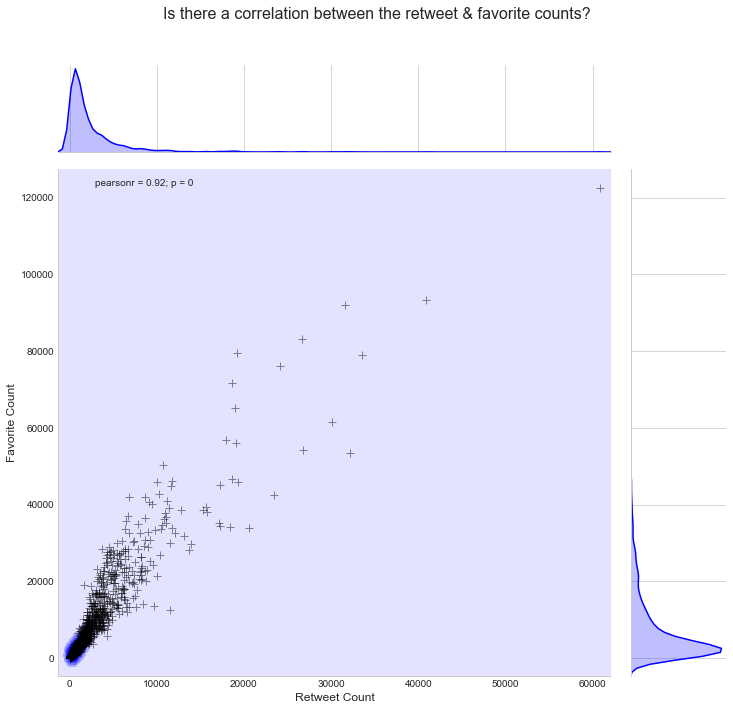

In [424]:
#Visualization comparing the favorite & retweet counts
sns.set_style('whitegrid')
g = sns.jointplot(x="retweet_count", 
                  y="favorite_count", 
                  data=df_master, 
                  color="blue",
                  kind="kde", 
                  size=10)
g.plot_joint(plt.scatter,  
             c="black",
             s=80, 
             linewidth=1, 
             marker="+",
             alpha=0.45)
g.set_axis_labels("Retweet Count", "Favorite Count",fontsize=12)

g.fig.subplots_adjust(top=0.9)
plt.suptitle('Is there a correlation between the retweet & favorite counts?',
                 fontsize=16)